In [1]:
"""
Created on Thu Jun 19 08:30:17 2025

@author: kennyaskelson
"""

'\nCreated on Thu Jun 19 08:30:17 2025\n\n@author: kennyaskelson\n'

##Data challenge 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [5]:
df = pd.read_json('public_cases.json')

In [6]:
# Expand the 'input' column into its own DataFrame
input_expanded = pd.json_normalize(df['input'])

In [7]:
# Combine it back with the original expected_output column
df_cleaned = pd.concat([input_expanded, df['expected_output']], axis=1)

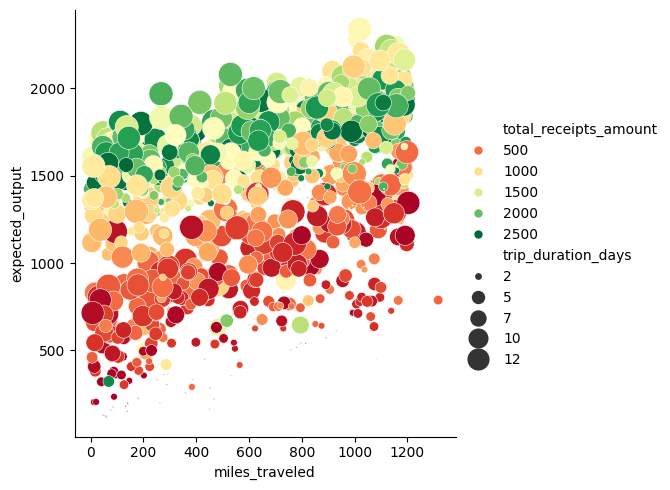

In [8]:
# Create a relational plot with multiple variables
sns.relplot(data=df_cleaned, x='miles_traveled', y='expected_output',
            hue='total_receipts_amount', palette='RdYlGn',
            size='trip_duration_days', sizes=(1, 300))
plt.show()

In [9]:
# Create a 3x2 grid of subplots
plt.figure(figsize=(10, 12))

<Figure size 1000x1200 with 0 Axes>

<Figure size 1000x1200 with 0 Axes>

In [10]:
column_names = ['trip_duration_days', 'miles_traveled', 'total_receipts_amount']

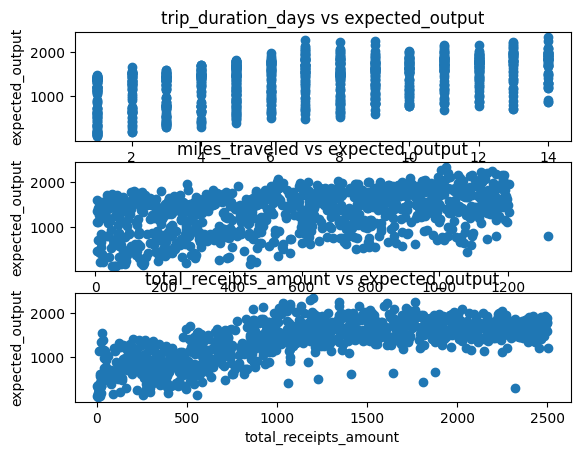

In [11]:
for idx, col in enumerate(column_names, start=1):
    plt.subplot(3, 1, idx)
    plt.scatter(df_cleaned[col], df_cleaned['expected_output'])
    plt.xlabel(col)
    plt.ylabel('expected_output')
    plt.title(f'{col} vs expected_output')

In [12]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

All look a bit correlated

In [13]:
for col in column_names:
    print(df_cleaned[col].corr(df_cleaned['expected_output']))

0.5135091042475849
0.4316616850154998
0.7040349789948348


'trip_duration_days' 0.5135091042475849
'miles_traveled' 0.4316616850154998
'total_receipts_amount' 0.7040349789948348

Yep all pretty correlated 

Pearson and Spearman give similar values 